<a href="https://colab.research.google.com/github/harshinikoppula30/intelliwaste_analyzer/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/Garbage_Classification_Project"


In [ ]:
!ls "/content/drive/MyDrive/Garbage_Classification_Project"


Garbage-Classification-System  __MACOSX


In [ ]:
!unzip "/content/drive/MyDrive/Garbage-Classification-System.zip" -d "/content/drive/MyDrive/Garbage_Classification_Project/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/__MACOSX/Garbage-Classification-System/full_garbage_dataset/plastic/._plastic242.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/full_garbage_dataset/plastic/plastic256.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/__MACOSX/Garbage-Classification-System/full_garbage_dataset/plastic/._plastic256.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/full_garbage_dataset/plastic/plastic530.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/__MACOSX/Garbage-Classification-System/full_garbage_dataset/plastic/._plastic530.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/full_garbage_dataset/plastic/plastic518.jpg  
  inflating: /content/drive/MyDrive/Garbage_Classification

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!ls /content


drive  sample_data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.5, 1.5),
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    validation_split=0.2  # 👈 80% train, 20% val
)


train_data = gen.flow_from_directory(
    '/content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/full_garbage_dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)


val_data = gen.flow_from_directory(
    '/content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/full_garbage_dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=True
)




Found 12423 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

vgg16 = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Optionally fine-tune last 4 layers
for layer in vgg16.layers[:-4]:
    layer.trainable = False
for layer in vgg16.layers[-4:]:
    layer.trainable = True

# Build custom head
x = layers.GlobalAveragePooling2D()(vgg16.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
prediction = layers.Dense(12, activation='softmax')(x)

# Create model
model = models.Model(inputs=vgg16.input, outputs=prediction)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
result = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data),
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 316s 761ms/step - accuracy: 0.6241 - loss: 1.2437 - val_accuracy: 0.7245 - val_loss: 0.8566
Epoch 2/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 288s 717ms/step - accuracy: 0.8167 - loss: 0.5784 - val_accuracy: 0.8316 - val_loss: 0.5678
Epoch 3/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 323s 721ms/step - accuracy: 0.8689 - loss: 0.4097 - val_accuracy: 0.8281 - val_loss: 0.5738
Epoch 4/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 321s 718ms/step - accuracy: 0.8804 - loss: 0.3605 - val_accuracy: 0.8223 - val_loss: 0.6084
Epoch 5/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 276s 710ms/step - accuracy: 0.8982 - loss: 0.3063 - val_accuracy: 0.7906 - val_loss: 0.7445
Epoch 6/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 279s 718ms/step - accuracy: 0.9138 - loss: 0.2693 - val_accuracy: 0.8516 - val_loss: 0.4965
Epoch 7/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 317s 706ms/step - accuracy: 0.9278 - loss: 0.2281 - val_accuracy: 0.8765 - val_loss: 0.4058
Epoch 8/15
389/389 ━━━━━━━━━━━━━━━━━━━━ 270s 692ms/step - accuracy: 0.9322 -

In [ ]:

model.save("/content/drive/MyDrive/waste_classifier_full_vgg16.keras")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/waste_classifier_full_vgg16.keras")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
output_class = [
    "battery", "biological", "brown-glass", "cardboard", "clothes", "green-glass",
    "metal", "paper", "plastic", "shoes", "trash", "white-glass"
]

In [ ]:
def waste_prediction(new_image):
    test_image = image.load_img(new_image, target_size=(224, 224))
    plt.axis("off")
    plt.imshow(test_image)
    plt.show()

    test_image = image.img_to_array(test_image) / 255
    test_image = np.expand_dims(test_image, axis=0)

    predicted_array = model.predict(test_image)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)

    print("Your waste material is", predicted_value, "with", predicted_accuracy, "% accuracy.")


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


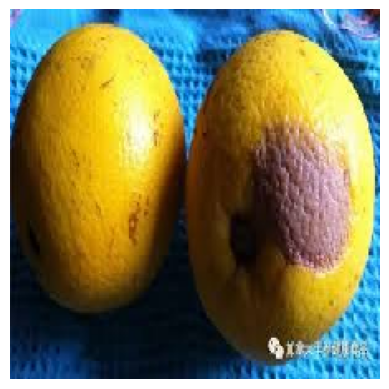

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Your waste material is biological with 99.99 % accuracy.


In [ ]:
waste_prediction("/content/drive/MyDrive/Garbage_Classification_Project/Garbage-Classification-System/test_images/biological_biological212.jpg")


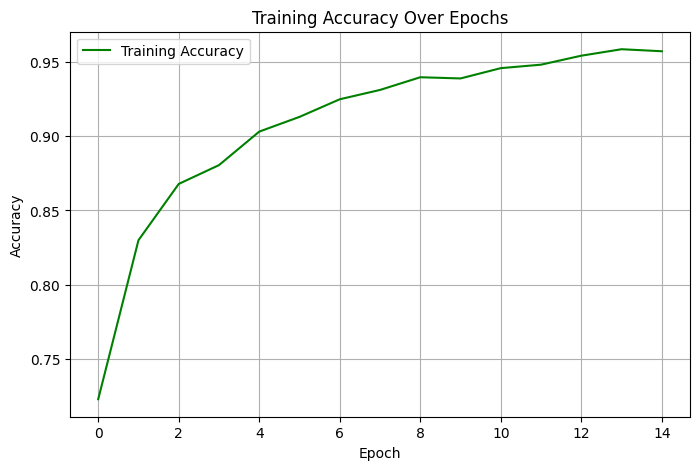

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(result.history["accuracy"], label="Training Accuracy", color='green')
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



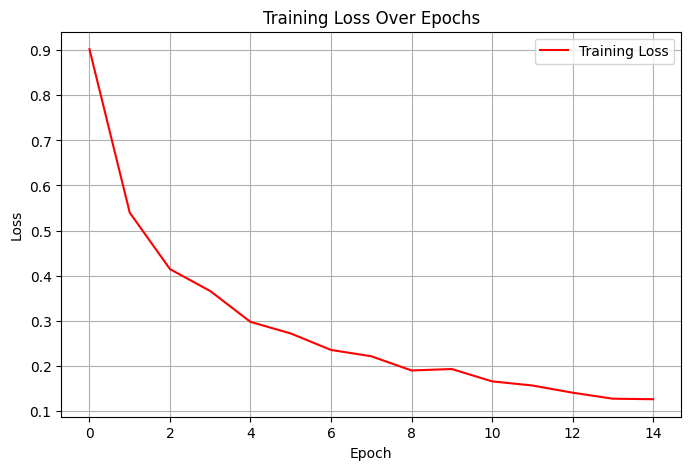

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(result.history["loss"], label="Training Loss", color='red')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/waste_classifier_vgg16.keras")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/waste_classifier_vgg16.keras")


In [ ]:
import os

test_dir = "test_images"

test_images = []
true_labels = []

output_class = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes',
                'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

# Manual fallback label mapping
label_map = {
    "brownglass": "brown-glass",
    "greenglass": "green-glass"
}

for file in os.listdir(test_dir):
    if file.endswith(".jpg"):
        test_images.append(file)
        matched_label = None
        # Try exact match from output_class
        for cls in output_class:
            if cls in file:
                matched_label = cls
                break
        # Try fallback mapping if no match
        if not matched_label:
            for key, value in label_map.items():
                if key in file:
                    matched_label = value
                    break
        if matched_label:
            true_labels.append(matched_label)
        else:
            print(f"⚠️ Skipped file (no label matched): {file}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

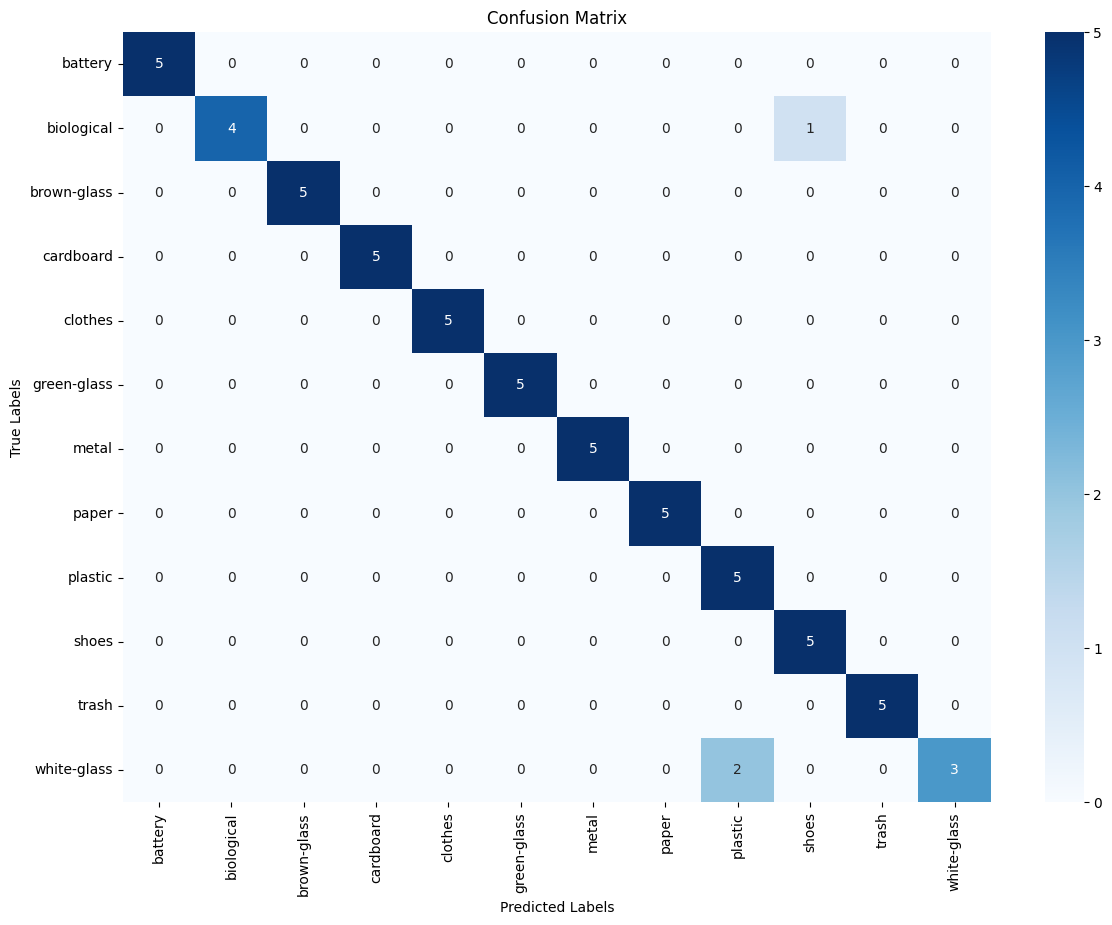


📋 Classification Report:

              precision    recall  f1-score   support

     battery       1.00      1.00      1.00         5
  biological       1.00      0.80      0.89         5
 brown-glass       1.00      1.00      1.00         5
   cardboard       1.00      1.00      1.00         5
     clothes       1.00      1.00      1.00         5
 green-glass       1.00      1.00      1.00         5
       metal       1.00      1.00      1.00         5
       paper       1.00      1.00      1.00         5
     plastic       0.71      1.00      0.83         5
       shoes       0.83      1.00      0.91         5
       trash       1.00      1.00      1.00         5
 white-glass       1.00      0.60      0.75         5

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predicted_labels = []

for img_file in test_images:
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = output_class[np.argmax(pred)]
    predicted_labels.append(pred_class)

# 🧠 Check what was predicted and what was true
print("✅ True Labels:", true_labels)
print("🔮 Predicted Labels:", predicted_labels)

# 📊 Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=output_class)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=output_class, yticklabels=output_class)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 📄 Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, labels=output_class))
